In [60]:
!rm -rf /app/notebooks/image_stitching/sample_data/keyboard_1-camera/*

In [23]:
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [24]:
image = Image.open('/app/notebooks/image_stitching/sample_data/complete_photo.jpg')

In [25]:
np_image = np.array(image) / 255.

In [26]:
np_image.shape

(591, 1280, 3)

In [62]:
591 / 2

295.5

In [56]:
1280/2

640.0

In [65]:
from skimage.util import view_as_windows
#this tiles your image into shape (tileX,tileY) overlapping tiles
size = (295, 640)
step_size = 156
tiles_r = np.expand_dims(view_as_windows(np_image[:, :, 0], size, step_size), axis=4)
tiles_g = np.expand_dims(view_as_windows(np_image[:, :, 1], size, step_size), axis=4)
tiles_b = np.expand_dims(view_as_windows(np_image[:, :, 2], size, step_size), axis=4)

tiles_rgb = np.concatenate((tiles_r, tiles_g, tiles_b), axis=4)

In [66]:
tiles_rgb.shape

(2, 5, 295, 640, 3)

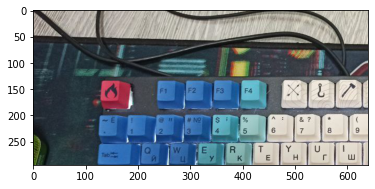

In [67]:
img2show = tiles_rgb[0, 0, :, :, :]

plt.imshow(img2show)

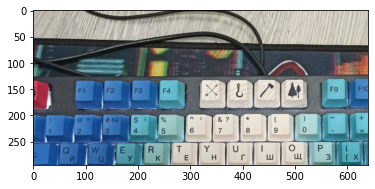

In [68]:
img2show = tiles_rgb[0, 1, :, :, :]

plt.imshow(img2show)

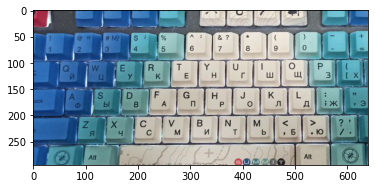

In [69]:
img2show = tiles_rgb[1, 1, :, :, :]

plt.imshow(img2show)

In [70]:
for i in range(tiles_rgb.shape[0]):
    for j in range(tiles_rgb.shape[1]):
        img2save = (tiles_rgb[i, j, :, :, :] * 255.).astype(np.uint8)
        pil_img2save = Image.fromarray(img2save)
        pil_img2save.save(f'/app/notebooks/image_stitching/sample_data/keyboard_1-camera/sample_{i}_{j}.png')